In [9]:
import torch
from transformers import InstructBlipProcessor, InstructBlipForConditionalGeneration
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [2]:
model = InstructBlipForConditionalGeneration.from_pretrained("Salesforce/instructblip-vicuna-7b")
processor = InstructBlipProcessor.from_pretrained("Salesforce/instructblip-vicuna-7b")

Loading checkpoint shards: 100%|██████████| 4/4 [00:29<00:00,  7.28s/it]
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
url = "https://raw.githubusercontent.com/salesforce/LAVIS/main/docs/_static/Confusing-Pictures.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
prompt = "What is unusual about this image?"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)

In [4]:
outputs = model.generate(
    **inputs,
    do_sample=False,
    num_beams=5,
    max_length=256,
    min_length=1,
    top_p=0.9,
    repetition_penalty=1.5,
    length_penalty=1.0,
    temperature=1,
)

/homes/55/kumud/anaconda/envs/experiments/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:490: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


In [5]:
generated_text = processor.batch_decode(outputs, skip_special_tokens=True)[0].strip()

In [6]:
generated_text

'The unusual aspect of this image is that a man is ironing clothes on the back of a yellow SUV, which is parked in the middle of a busy city street. This is an unconventional approach to ironing clothes, as it requires the man to balance himself and his ironing equipment on top of the vehicle while navigating through traffic. Additionally, the presence of taxis and other vehicles in the scene further emphasizes the unusual nature of this situation.'

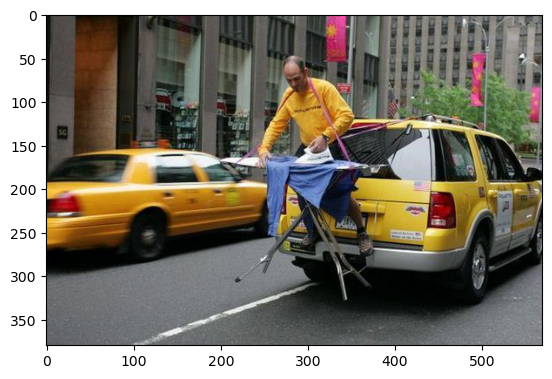

In [10]:
plt.imshow(image)
plt.show()